In [45]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
all_files = glob.glob("data/*TAS_lock.csv")

li = []

for filename in sorted(all_files):
    df = pd.read_csv(filename, index_col=None, header=0,sep=";")
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame[["NumberOfThreads", "NumberOfIterations","RunTime","HowFair"]] = frame[["NumberOfThreads", "NumberOfIterations","RunTime","HowFair"]].astype(float)


In [46]:
sorted(all_files)

['data/1_10000_TAS_lock.csv',
 'data/1_10000_TTAS_lock.csv',
 'data/2_10000_TAS_lock.csv',
 'data/2_10000_TTAS_lock.csv',
 'data/3_10000_TAS_lock.csv',
 'data/3_10000_TTAS_lock.csv',
 'data/4_10000_TAS_lock.csv',
 'data/4_10000_TTAS_lock.csv',
 'data/5_10000_TAS_lock.csv',
 'data/5_10000_TTAS_lock.csv',
 'data/6_10000_TAS_lock.csv',
 'data/6_10000_TTAS_lock.csv',
 'data/7_10000_TAS_lock.csv',
 'data/7_10000_TTAS_lock.csv',
 'data/8_10000_TAS_lock.csv',
 'data/8_10000_TTAS_lock.csv',
 'data/9_10000_TAS_lock.csv',
 'data/9_10000_TTAS_lock.csv']

In [47]:
frame.RunTime

0     0.250429
1     0.202165
2     0.315901
3     0.300914
4     0.353841
5     0.373202
6     0.354964
7     0.452452
8     0.462746
9     0.532138
10    0.457294
11    0.528730
12    0.390454
13    0.399513
14    0.391801
15    0.570816
16    0.503070
17    0.495593
Name: RunTime, dtype: float64

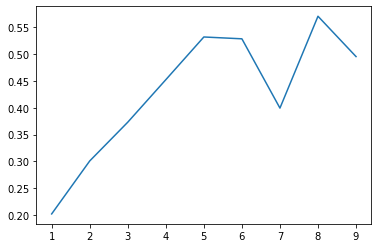

In [44]:
plt.plot(frame.NumberOfThreads,frame.RunTime)

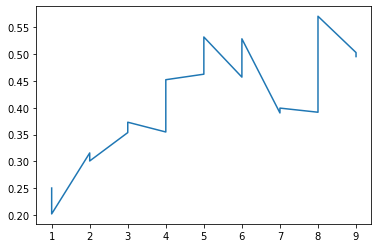

In [48]:
plt.plot(frame.NumberOfThreads,frame.RunTime)

In [17]:
frame

,NumberOfThreads,NumberOfIterations,RunTime,HowFair,
0,10.0,10000.0,0.482386,1.0,NaN
1,11.0,10000.0,0.534373,1.0,NaN
2,12.0,10000.0,0.398702,1.0,NaN
3,13.0,10000.0,0.430657,1.0,NaN
4,14.0,10000.0,0.561742,1.0,NaN
5,15.0,10000.0,0.508488,1.0,NaN
6,16.0,10000.0,0.563731,1.0,NaN
7,17.0,10000.0,0.461650,1.0,NaN
8,18.0,10000.0,0.509247,1.0,NaN
9,19.0,10000.0,0.574588,1.0,NaN
